<a href="https://colab.research.google.com/github/Mehranwaheed/MSC_Group_Project/blob/main/subimages_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
train_normal_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Train/Normal"
train_anomaly_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Train/Anomaly"

# Extract features and labels for normal images
X_train_normal, y_train_normal = extract_features_and_labels(train_normal_folder, label=0)

# Extract features and labels for anomaly images
X_train_anomaly, y_train_anomaly = extract_features_and_labels(train_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_train = X_train_normal + X_train_anomaly
y_train = y_train_normal + y_train_anomaly


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
test_normal_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Test/Normal"
test_anomaly_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Test/Anomaly"

# Extract features and labels for normal images
X_test_normal, y_test_normal = extract_features_and_labels(test_normal_folder, label=0)

# Extract features and labels for anomaly images
X_test_anomaly, y_test_anomaly = extract_features_and_labels(test_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_test = X_test_normal + X_test_anomaly
y_test = y_test_normal + y_test_anomaly


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.50%


In [ ]:
import joblib
#joblib.dump(svm_classifier,"/content/drive/MyDrive/faulty-product-detection/Models/resnet_50.pkl")

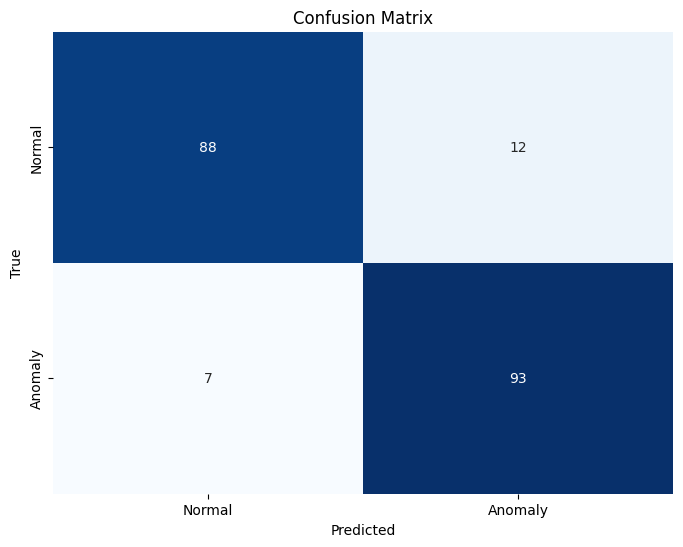

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Combine features for normal and anomaly images in the test set
X_test = np.concatenate((X_test_normal, X_test_anomaly), axis=0)

# Predict labels for the combined test set
y_pred_test = svm_classifier.predict(X_test)

# True labels for the test set
y_true_test = [0]*len(X_test_normal) + [1]*len(X_test_anomaly)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Identify misclassified images
misclassified_normal = [image_name for image_name, pred_label in zip(os.listdir(test_normal_folder), y_pred_test[:len(X_test_normal)]) if pred_label == 1]
misclassified_anomaly = [image_name for image_name, pred_label in zip(os.listdir(test_anomaly_folder), y_pred_test[len(X_test_normal):]) if pred_label == 0]

print("Misclassified normal images:", misclassified_normal)
print("Misclassified anomaly images:", misclassified_anomaly)


Accuracy on test set: 0.905
Misclassified normal images: ['276.JPG', '293.JPG', '320.JPG', '311.JPG', '329.JPG', '347.JPG', '284.JPG', '338.JPG', '337.JPG', '374.JPG', '356.JPG', '365.JPG']
Misclassified anomaly images: ['2908.JPG', '2874.JPG', '3399.JPG', '3419.JPG', '1738.JPG', '2166.JPG', '2139.JPG']


# VGG 16

In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.vgg16(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
train_normal_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Train/Normal"
train_anomaly_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Train/Anomaly"

# Extract features and labels for normal images
X_train_normal, y_train_normal = extract_features_and_labels(train_normal_folder, label=0)

# Extract features and labels for anomaly images
X_train_anomaly, y_train_anomaly = extract_features_and_labels(train_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_train = X_train_normal + X_train_anomaly
y_train = y_train_normal + y_train_anomaly


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 151MB/s]


In [ ]:
import os
import shutil
import random
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image


# Load pre-trained ResNet-50 model
model = models.vgg16(pretrained=True)
model.eval()

# Preprocess input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit ResNet input size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Function to extract features and labels
def extract_features_and_labels(folder_path, label):
    images = os.listdir(folder_path)
    features = []
    labels = []

    for image_name in images:
        input_image_path = os.path.join(folder_path, image_name)

        input_image = Image.open(input_image_path)
        input_tensor = transform(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            features_tensor = model(input_batch)
        feature_vector = features_tensor.squeeze().numpy()
        features.append(feature_vector)
        labels.append(label)
    return features, labels

# Path to training folders
test_normal_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Test/Normal"
test_anomaly_folder = "/content/drive/MyDrive/faulty-product-detection/Data/Sub Images/Test/Anomaly"

# Extract features and labels for normal images
X_test_normal, y_test_normal = extract_features_and_labels(test_normal_folder, label=0)

# Extract features and labels for anomaly images
X_test_anomaly, y_test_anomaly = extract_features_and_labels(test_anomaly_folder, label=1)

# Combine normal and anomaly features and labels
X_test = X_test_normal + X_test_anomaly
y_test = y_test_normal + y_test_anomaly


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.50%


In [ ]:
import joblib
#joblib.dump(svm_classifier,"/content/drive/MyDrive/faulty-product-detection/Models/vgg_16.pkl")

['/content/drive/MyDrive/faulty-product-detection/Models/vgg_16.pkl']

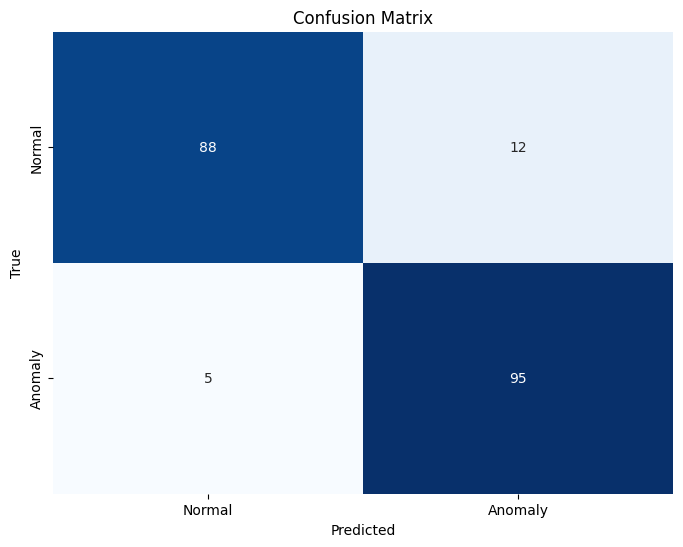

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Combine features for normal and anomaly images in the test set
X_test = np.concatenate((X_test_normal, X_test_anomaly), axis=0)

# Predict labels for the combined test set
y_pred_test = svm_classifier.predict(X_test)

# True labels for the test set
y_true_test = [0]*len(X_test_normal) + [1]*len(X_test_anomaly)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy on test set:", accuracy)

# Identify misclassified images
misclassified_normal = [image_name for image_name, pred_label in zip(os.listdir(test_normal_folder), y_pred_test[:len(X_test_normal)]) if pred_label == 1]
misclassified_anomaly = [image_name for image_name, pred_label in zip(os.listdir(test_anomaly_folder), y_pred_test[len(X_test_normal):]) if pred_label == 0]

print("Misclassified normal images:", misclassified_normal)
print("Misclassified anomaly images:", misclassified_anomaly)


Accuracy on test set: 0.915
Misclassified normal images: ['321.JPG', '320.JPG', '311.JPG', '312.JPG', '347.JPG', '284.JPG', '322.JPG', '338.JPG', '374.JPG', '366.JPG', '365.JPG', '357.JPG']
Misclassified anomaly images: ['2908.JPG', '2874.JPG', '3405.JPG', '1738.JPG', '2139.JPG']
